In [ ]:
# importing basic packages

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import plotly.express as px
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#mounting the notebook to my drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#setting the directory to the proper folder
import os
os.chdir("/content/drive/My Drive/Stock Algorithim")

Expolring the Data


In [ ]:
spyData=pd.read_csv("Datasets/spydata.csv",index_col=0)

In [ ]:
print(len(spyData))

7717


In [ ]:
spyData.head(10)

,Open,High,Low,Close,"MACD(12,26)",Sig(9)
Date,,,,,,
1/29/1993,24.9646,24.9646,24.8404,24.9468,0.0000,0.0000
2/1/1993,24.9646,25.1243,24.9646,25.1243,0.0142,0.0028
2/2/1993,25.1065,25.1952,25.0533,25.1775,0.0293,0.0081
2/3/1993,25.2130,25.4614,25.1952,25.4437,0.0621,0.0189
2/4/1993,25.5324,25.6033,25.4791,25.5501,0.0956,0.0343
2/5/1993,25.5324,25.5856,25.3904,25.5324,0.1193,0.0513
2/8/1993,25.5324,25.6211,25.4969,25.5324,0.1365,0.0683
2/9/1993,25.4437,25.4437,25.3017,25.3549,0.1343,0.0815
2/10/1993,25.3549,25.4082,25.2840,25.3904,0.1339,0.0920


# Step 1: Predictor
- Building an RNN model that can predict the subsequent data with suffcient accuracy.

In [ ]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(spyData) * .8)
training_data_len

#Splitting the dataset
train_data = spyData[:training_data_len].iloc[:,3:4]
test_data = spyData[training_data_len:].iloc[:,3:4]
print(train_data.shape, test_data.shape)

(6174, 1) (1543, 1)


In [ ]:
print(train_data)

              Close
Date               
1/29/1993   24.9468
2/1/1993    25.1243
2/2/1993    25.1775
2/3/1993    25.4437
2/4/1993    25.5501
...             ...
7/28/2017  221.9650
7/31/2017  221.8391
8/1/2017   222.3336
8/2/2017   222.4414
8/3/2017   222.0099

[6174 rows x 1 columns]


In [ ]:
# Selecting Open Price values
dataset_train = train_data.Close.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(6174, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[45:52])


[[0.00320279]
 [0.00284232]
 [0.00329278]
 [0.0031128 ]
 [0.00491516]
 [0.00518564]
 [0.00500515]]


In [ ]:
# Selecting Close Price values
dataset_test = test_data.Close.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(scaled_test[:5])


[[0.04330971]
 [0.04494096]
 [0.04277753]
 [0.04274202]
 [0.030365  ]]


In [ ]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()

[array([1.52480179e-03, 2.42219011e-03, 2.69115382e-03, 4.03698352e-03,
       4.57491094e-03, 4.48542490e-03, 4.48542490e-03, 3.58803658e-03,
       3.76751424e-03, 4.39543328e-03, 3.40906448e-03, 1.79477664e-04,
       8.99916176e-05, 0.00000000e+00, 4.48441376e-04, 8.96882751e-04,
       8.07396704e-04, 2.42219011e-03, 2.69115382e-03, 2.87063149e-03,
       2.51167616e-03, 4.39543328e-03, 4.93386627e-03, 4.21595561e-03,
       3.85750586e-03, 6.72763177e-03, 6.27919040e-03, 6.54865968e-03,
       6.18970435e-03, 4.84387465e-03, 5.47179369e-03, 5.47179369e-03,
       4.66490256e-03, 5.47179369e-03, 5.27563219e-03, 4.55468811e-03,
       4.82516853e-03, 4.82516853e-03, 5.63610423e-03, 4.91516015e-03,
       5.45612100e-03, 5.81659304e-03, 5.72660142e-03, 5.27563219e-03,
       2.57183909e-03, 3.20279156e-03, 2.84231952e-03, 3.29278318e-03,
       3.11279994e-03, 4.91516015e-03])]
[0.005185640573479172]

[array([1.52480179e-03, 2.42219011e-03, 2.69115382e-03, 4.03698352e-03,
       4.5

In [ ]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (1493, 50, 1) y_test : (1493, 1)


In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (6124, 50, 1) y_train : (6124, 1)


In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('Models/simpleRNN.keras')

In [ ]:
X_test_Set=X_test[:10,:,:]

In [ ]:
X_test_Set.shape

(10, 50, 1)

In [ ]:
y_RNN = model.predict(X_test)
y_RNN_O = scaler.inverse_transform(y_RNN)


47/47 [==============================] - 1s 8ms/step


In [ ]:
y_lstm=pd.read_csv('Datasets/lstmPrediction-10.csv')

In [ ]:
y_gru=pd.read_csv('Datasets/rnnPrediction-1.csv')

In [ ]:
y_RNN_O= y_lstm["Close"]

In [ ]:
test_data["Close"]

Date
2017-08-04    222.4145
2017-08-07    222.8280
2017-08-08    222.2796
2017-08-09    222.2706
2017-08-10    219.1332
                ...   
2023-09-15    443.3700
2023-09-18    443.6300
2023-09-19    442.7100
2023-09-20    438.6400
2023-09-21    433.2400
Name: Close, Length: 1543, dtype: float64

In [ ]:
len(y_RNN_O)

1538

In [ ]:
#given a series of predicted values, real values and holdout
#it compares the  n current days value to the n+holdout days value and assigns either 0 or 1
#1 if the value goes up 0 if it goes down
# creates a DF with both the real values and predicted values
def binarize(holdout,pred,test):
  test=test[:len(pred)]
  binaryTest = list()
  binaryPred = list()
  for i in range(0,len(y_RNN_O)-holdout,holdout):
    if pred[i+holdout]>pred[i]:
      binaryPred.append(1)
    else:
      binaryPred.append(0)
    if test[i+holdout]>test[i]:
      binaryTest.append(1)
    else:
      binaryTest.append(0)
  return pd.DataFrame({"Test":binaryTest,"Pred":binaryPred})

In [ ]:
maxHoldout= 110
scores=list()
for i in range(1,maxHoldout):
  data=binarize(i,y_RNN_O,test_data["Close"])
  accuracy = accuracy_score(data["Test"], data["Pred"])

  scores.append(accuracy)
  #print("Holdout: ",i," Accuracy: ",accuracy)
scoresDF= pd.DataFrame({"Holdout":range(1,maxHoldout),"Accuracy": scores})
scoresDF=scoresDF.sort_values('Accuracy',ascending=False)


In [ ]:
scoresDF

,Holdout,Accuracy
108,109,1.000000
59,60,1.000000
81,82,1.000000
78,79,1.000000
76,77,1.000000
...,...,...
3,4,0.872396
102,103,0.857143
2,3,0.851562
1,2,0.811198


In [ ]:
fig = px.scatter(x=scoresDF["Holdout"], y=scoresDF["Accuracy"])
fig.show()

In [ ]:
  data=binarize(1,y_RNN_O,test_data["Close"])

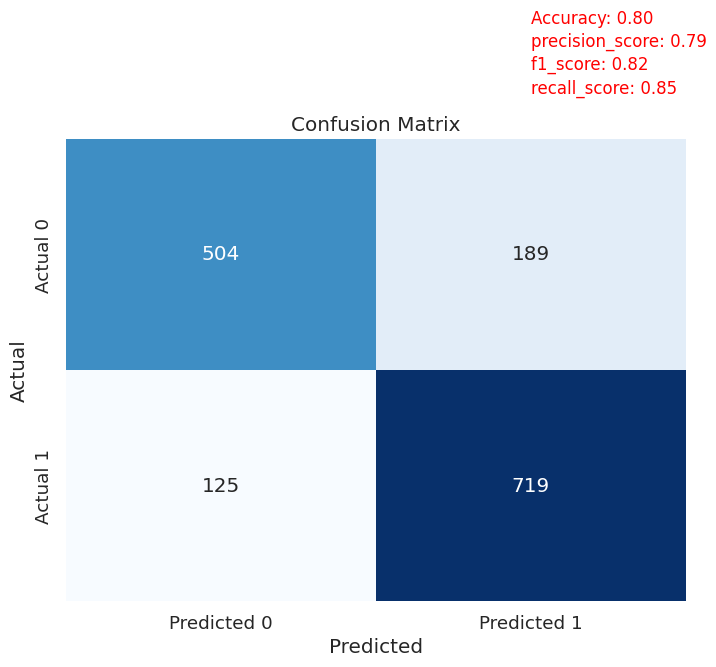

In [ ]:
from sklearn.metrics import precision_score, f1_score,recall_score


# Calculate the confusion matrix
cm = confusion_matrix(data["Test"], data["Pred"])

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Calculate and display the accuracy
accuracy = accuracy_score(data["Test"], data["Pred"])
plt.text(1.5, -0.5, f"Accuracy: {accuracy:.2f}", fontsize=12, color="red")

precision_score = precision_score(data["Test"], data["Pred"])
plt.text(1.5, -0.4, f"precision_score: {precision_score:.2f}", fontsize=12, color="red")

f1_score = f1_score(data["Test"], data["Pred"])
plt.text(1.5, -0.3, f"f1_score: {f1_score:.2f}", fontsize=12, color="red")

recall_score = recall_score(data["Test"], data["Pred"])
plt.text(1.5, -0.2, f"recall_score: {recall_score:.2f}", fontsize=12, color="red")

plt.show()

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=test_data["Close"],
    mode='lines',
    name='Test Data'
))
fig.update_layout(title="Model Predictions LSTM")
fig.add_trace(go.Scatter(
    x=pd.to_datetime(train_data.index),
    y=train_data["Close"],
    mode='lines',
    name='Train Data'
))
fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=y_RNN_O,
    mode='lines',
    name='LSTM prediction'
))


In [ ]:
test_data.index=pd.to_datetime(test_data.index)

In [ ]:
spyClose = spyData

In [ ]:
scoresDF.head()

,Holdout,Accuracy
108,109,1.0
59,60,1.0
81,82,1.0
78,79,1.0
76,77,1.0


In [ ]:
data

,Test,Pred
0,1,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1532,1,1
1533,1,1
1534,0,0
1535,1,1


In [ ]:
test_data[:len(y_RNN_O)]

,Close
Date,
2017-08-04,222.4145
2017-08-07,222.8280
2017-08-08,222.2796
2017-08-09,222.2706
2017-08-10,219.1332
...,...
2023-09-08,443.9540
2023-09-11,446.8737
2023-09-12,444.4223


In [ ]:
#ored should be formated as numerical continous predictions
def returns(holdout,pred,test):
  test=test[:len(pred)]
  algoReturns = list()
  algoReturnsPercent = list()

  for i in range(0,len(pred)-holdout,holdout):
    nReturn = 0 #return for current trade
    if pred[i+holdout]>pred[i]:
      #go long
      nReturn = test[i+holdout]-test[i]
    else:
      #go short
      nReturn = test[i]-test[i+holdout]
    algoReturns.append(nReturn)
    algoReturnsPercent.append((nReturn/test[i]))

  return sum(algoReturns),algoReturns,algoReturnsPercent


In [ ]:
holdOutReturns=list()
holdoutPer=list()
for i in range(1,maxHoldout):
  nReturn,_,_=returns(i,y_RNN_O,test_data["Close"])
  holdOutReturns.append(nReturn)
  holdoutPer.append((nReturn/test_data["Close"][0])*100)

In [ ]:
len(holdOutReturns)

109

In [ ]:
len(range(1,maxHoldout))

109

In [ ]:
holdoutReturnsDF= pd.DataFrame({"Holdout":range(1,maxHoldout),"Returns": holdOutReturns, "Return Percentage" : holdoutPer})
holdoutReturnsDF=holdoutReturnsDF.sort_values('Returns',ascending=False)


In [ ]:
holdoutReturnsDF.head()

,Holdout,Returns,Return Percentage
0,1,3356.0535,1508.918483
1,2,2515.9214,1131.185871
2,3,2176.3066,978.491330
3,4,1899.8246,854.181989
4,5,1730.7422,778.160686


In [ ]:
fig = px.scatter(x=holdoutReturnsDF["Holdout"], y=holdoutReturnsDF["Returns"])
fig.update_layout(
    xaxis_title="Holdout",
    yaxis_title="Returns",
)

fig.show()

In [ ]:
fig = px.scatter(x=holdoutReturnsDF["Holdout"], y=holdoutReturnsDF["Return Percentage"])
fig.update_layout(
    xaxis_title="Holdout",
    yaxis_title="Return Percentage %",
)

fig.show()

In [ ]:
nReturn,_,AlgoReturnList=returns(12,y_RNN_O,test_data["Close"])


In [ ]:
POScounter = 0
NEGcounter = 0
for i in range(0,len(AlgoReturnList)):
  if AlgoReturnList[i]>0:
    POScounter+=1
  else:
    NEGcounter+=1

In [ ]:
POScounter

120

In [ ]:
NEGcounter

8

In [ ]:
test_data["Close"][0]

222.4145

In [ ]:
test_data["Close"][len(y_RNN_O)]

443.37

In [ ]:
spyReturn = (test_data["Close"][len(y_RNN_O)]-test_data["Close"][0])
print(spyReturn)
#the returns if you had just held the stock from begging of the test data to the end

220.9555


In [ ]:
returnPercSPY = (spyReturn/test_data["Close"][0])*100
#perecent return for S&P 500
print("Perecent Returns From Begging of Test Spy Data to end : {:.2f}%".format(returnPercSPY))

Perecent Returns From Begging of Test Spy Data to end : 99.34%


In [ ]:
SPYReturnList=list()
vals=test_data["Close"]

for i in range(len(vals)-1):
  SPYReturnList.append((vals[i+1]-vals[i])/vals[i])

In [ ]:
fig = px.line(x=range(0,len(SPYReturnList)), y=SPYReturnList)
fig.show()

In [ ]:
AlgoReturnList=list()
vals=test_data["Close"]

for i in range(len(y_RNN_O)-2):
  if(y_RNN_O[i+1]>y_RNN_O[i]):
    AlgoReturnList.append((vals[i+1]-vals[i])/vals[i])
  if(y_RNN_O[i+1]<y_RNN_O[i]):
    AlgoReturnList.append((-vals[i+1]+vals[i])/vals[i])

In [ ]:
fig = px.scatter(x=range(0,len(AlgoReturnList)), y=AlgoReturnList)
fig.show()

In [ ]:
CompRetAlgoList = list()
CompRetSPList = list()
CompRetAlgo = 1
CompRetSP = 1
for i in range(0,int(len(AlgoReturnList))):
    if i==0:
        CompRetAlgo = (1+AlgoReturnList[i])
    else:
        CompRetAlgo = CompRetAlgo * (1+AlgoReturnList[i])

    CompRetAlgoList.append(CompRetAlgo)

    if i == 0:
        CompRetSP = (1 + SPYReturnList[i])
    else:
        CompRetSP = CompRetSP * (1 + SPYReturnList[i])

    CompRetSPList.append(CompRetSP)

In [ ]:
pd.DataFrame({"SPY-Return-Percent":SPYReturnList[:len(AlgoReturnList)], "Algo-Return-Percent":AlgoReturnList}).to_csv("ReturnLists.csv")

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.array(range(0,len(CompRetSPList))),
    y=np.array(CompRetAlgoList),
    mode='lines',
    name='CompRetAlgoList'
))
fig.add_trace(go.Scatter(
    x=np.array(range(0,len(CompRetSPList))),
    y=np.array(CompRetSPList),
    mode='lines',
    name='CompRetSPList'
))
fig.show()